# Brief introduction to object-oriented programming

Object-oriented programming (OOP) is a substantial topic.  One could take an entire yearlong course learning the theory of object-oriented programming.  In this short notebook, we will just briefly introduce some aspects of object-oriented programming in the context of Python.

## Examples

<iframe width="560" height="315" src="https://www.youtube.com/embed/ZNpqFcOtY7U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In this section, we will review two examples of object-oriented programming we have already seen earlier in the course.

The first example that comes to mind is our way of plotting in Matplotlib.

In [1]:
import matplotlib.pyplot as plt

Here is the **non**-object oriented programming approach to plotting in Matplotlib.  (This is called the *state-based interface*.)

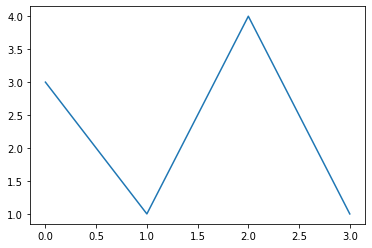

In [2]:
plt.plot([3,1,4,1])

Here is the object-oriented approach.

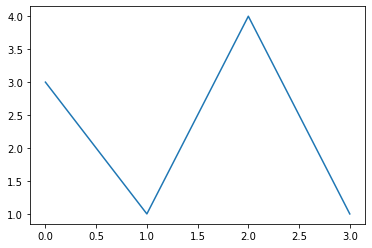

In [3]:
fig, ax = plt.subplots()
ax.plot([3,1,4,1])

The two approaches look very similar.  In the state-based interface, we call `plt.plot`, in the object-oriented interface, we call `ax.plot`.

Notice the first sentence in the help documentation for `plt.plot`.

> Help on function plot in module matplotlib.pyplot

In [4]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

Compare that to the the documentation for `ax.plot`:

> `plot(*args, ...)` method of `matplotlib.axes._subplots.AxesSubplot` instance

It is a subtle difference.  The first, `plt.plot`, is a stand-alone function defined by `pyplot`.  The second, `ax.plot`, is a method attached to a specific object, `ax`.  The object-oriented approach probably seems less natural when you first encounter it, but once you get used to it, the object-oriented approach can make complex tasks significantly more streamlined.  (In the [next section](pathlib), we will see how using a more specialized object than a string can also simplify a relatively straightforward task.)

In [6]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [5]:
help(ax.plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

Another situation where we have seen the object-oriented approach was when producing random numbers in NumPy.  Before I learned this approach, I would have expected that there was some stand-alone function to produce random numbers.  Instead of using functions, we use methods which are attached to a random number generator object.

In [7]:
import numpy as np

Here we are *instantiating* ("creating an instance of") a random number generator.

In [8]:
rng = np.random.default_rng()

In this case, the *object* in our *object-oriented programming* is a `Generator` object.

In [9]:
type(rng)

numpy.random._generator.Generator

This next line, `rng.random(5)`, is calling the `random` method of the object `rng`.

In [10]:
rng.random(5)

array([0.09166737, 0.4150235 , 0.24720181, 0.40595135, 0.69774883])

Again, if we read the beginning of the help documentation for `rng.random`, we see the language reinforcing that we are using the object-oriented approach.

> random(...) method of `numpy.random._generator.Generator` instance

In our specific case, `rng` is the `numpy.random._generator.Generator` instance, and we are calling its `random` method to produce a length-5 array of random numbers.

In [11]:
help(rng.random)

Help on built-in function random:

random(...) method of numpy.random._generator.Generator instance
    random(size=None, dtype=np.float64, out=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random` by `(b-a)` and add `a`::
    
      (b - a) * random() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    dtype : dtype, optional
        Desired dtype of the result, only `float64` and `float32` are supported.
        Byteorder must be native. The default value is np.float64.
    out : ndarray, optional
        Alternative output array in which to place the result. If size is not None,
        it

In summary, those were two examples of where we have used the object-oriented approach earlier in the class.  In `ax.plot`, the `ax` was the object.  In `rng.random`, the `rng` was the object.

In the next section, we will see how the `pathlib` library (which we have not yet seen), and its object-oriented approach, simplifies some tasks in comparison to the functions available to us from the `os` library.

(pathlib)=
## os vs. pathlib

<iframe width="560" height="315" src="https://www.youtube.com/embed/MWyGxW7UCSA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Here is a relatively straightforward task:

* Find all files (as opposed to folders) in `/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22`.

Based on what we have seen so far, the `os` module is the most obvious tool to use for accomplishing this task. We will see, however, that by instead using the `pathlib` module, we can accomplish the task more easily.  The reason `pathlib` makes this task easier is because it utilizes an object-oriented approach.

But let's start by seeing how we would start work on this task using `os`.

In [1]:
import os

The obvious function to use is `os.listdir`.

In [2]:
os.listdir("/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22")

['.DS_Store',
 'Week1',
 'LICENSE',
 'images',
 'intro.md',
 '_toc.yml',
 '.gitignore',
 'Week2',
 '_build',
 '_config.yml',
 '.gitattributes',
 'Week4',
 '.git']

Which of these represent files and which represent folders?  For example, are you confident whether `".gitignore"` is a file or a folder?  What about `"LICENSE"`?  What about `"_build"`?

Let's save the list returned by `os.listdir`.

In [3]:
mylist = os.listdir("/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22")

There is certainly no method we can call on any of these objects to determine if these represent files or folders, because they are just strings.  Let's verify that they really are nothing more than strings using list comprehension.

In [4]:
[type(x) for x in mylist]

[str, str, str, str, str, str, str, str, str, str, str, str, str]

Our lives would be much easier if, instead of returning a list of plain strings, `os.listdir` returned a list of some more specialized objects on which we could call a method to help us determine if they represent files or folders.  If you agree that would make things easier, then you already have a good intuition for the simplifications provided by the object-oriented approach.

There is an alternative to `os.listdir` that we can access using a different library, `pathlib`.  The module `pathlib` is a relatively recent addition to Python: it was introduced to Python in Python 3.4, and currently (in Summer 2022) these notes are being written using Python 3.10.

Similarly to how we only imported `Image` from `PIL`, we will only import `Path` from `pathlib`.  This will give us access to a new type of object, `Path` objects.

In [5]:
from pathlib import Path

The syntax shown in the documentation, `class Path(PurePath)`, is an indication of how new types of objects are defined in Python.  (We will define our own new types of objects in the next section.)

In [6]:
help(Path)

Help on class Path in module pathlib:

class Path(PurePath)
 |  Path(*args, **kwargs)
 |  
 |  PurePath subclass that can make system calls.
 |  
 |  Path represents a filesystem path but unlike PurePath, also offers
 |  methods to do system calls on path objects. Depending on your system,
 |  instantiating a Path will return either a PosixPath or a WindowsPath
 |  object. You can also instantiate a PosixPath or WindowsPath directly,
 |  but cannot instantiate a WindowsPath on a POSIX system or vice versa.
 |  
 |  Method resolution order:
 |      Path
 |      PurePath
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, t, v, tb)
 |  
 |  absolute(self)
 |      Return an absolute version of this path.  This function works
 |      even if the path doesn't point to anything.
 |      
 |      No normalization is done, i.e. all '.' and '..' will be kept along.
 |      Use resolve() to get the canonical path to a file.
 |  
 |  chmod(self,

In the next line, we are instantiating a new `Path` object `p`.  Sometimes when we instantiate a new object, like when we call `np.random.default_rng()`, we do not pass any arguments.  In this case, we are passing one argument, the string `"/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22"` representing what path we want `p` to represent.

In [7]:
p = Path("/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22")

Let's check the type of `p` to make sure it really is a new type of object.  (I haven't looked up what `PosixPath` represents; for now, I'm just thinking of it as the same as `Path`.)

In [8]:
type(p)

pathlib.PosixPath

This object `p` has a method `iterdir`, which is analogous to `os.listdir`.

In [9]:
p.iterdir()

<generator object Path.iterdir at 0x111159700>

One difference between `p.iterdir` and `os.listdir` is that `p.iterdir` returns what is called a "generator object" as opposed to a list, but it is easy enough to convert that generator into a list.

In [10]:
list(p.iterdir())

[PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/.DS_Store'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/Week1'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/LICENSE'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/images'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/intro.md'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/_toc.yml'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/.gitignore'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/Week2'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/_build'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/_config.yml'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/.gitattributes'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/Week4'),
 PosixPath('/Users/christopherdavis/Docume

Our `iterdir` list is showing full paths.  If we want to just see the last portion, the file name or the folder name, we can get the `name` attribute of each of the listed objects.  The following list should be the exact same as our `os.listdir` list from above (possibly in a different order).

(Aside: Notice in the following `[x.name for x in p.iterdir()]` we are not converting `p.iterdir()` to a list.  A common temptation to new Python programmers would be to instead write `[x.name for x in list(p.iterdir())]`, so that we are iterating through a more familiar object (a list instead of a generator).  But there is no reason to make that conversion in this context.  If all we want to do is iterate through `p.iterdir()`, then the generator object is just as good as (or better than) a list.  The name itself, with the letters "iter", is emphasizing that the object produced is good for iterating.)

In [11]:
[x.name for x in p.iterdir()]

['.DS_Store',
 'Week1',
 'LICENSE',
 'images',
 'intro.md',
 '_toc.yml',
 '.gitignore',
 'Week2',
 '_build',
 '_config.yml',
 '.gitattributes',
 'Week4',
 '.git']

The fundamental difference between `p.iterdir` and `os.listdir` is that `p.iterdir` produces `PosixPath` objects, the same as `p` was, not strings.  (The `x.name` attributes are probably strings, but the `x` variables themselves are more useful.)  This will make our task of differentiating between files and folders much easier.

In [12]:
[type(x) for x in p.iterdir()]

[pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath,
 pathlib.PosixPath]

The fact that `x` is a `Path` instead of a string gives us access to all sorts of extra methods and attributes.  Most relevant to our task is the `is_file` method.

In [13]:
[x.is_file() for x in p.iterdir()]

[True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False]

If we want a list containing the files (as opposed to the folders), we can use the following.  Here we are only keeping the `x` values that represent files.

In [14]:
[x for x in p.iterdir() if x.is_file()]

[PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/.DS_Store'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/LICENSE'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/intro.md'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/_toc.yml'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/.gitignore'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/_config.yml'),
 PosixPath('/Users/christopherdavis/Documents/GitHub/UCI-Math-9-F22/.gitattributes')]

The task itself (finding files) was not the important point in this section.  Instead the important point was how using the object-oriented approach, in particular using these specialized `Path` objects as opposed to plain strings, made the task much easier.

## Defining a NamedColor class

<iframe width="560" height="315" src="https://www.youtube.com/embed/pWkvLx0E-RM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

To do object-oriented programming, we need to know how to define our own types of objects.  Such custom objects can have whatever methods and attributes we want.  Here is an example of defining a `NamedColor` class; we specify that all objects of this type will have a `name` attribute and an `rgb` attribute.

In [1]:
class NamedColor():
    name = "Blue"
    rgb = [0,0,255]

Here is an example of instantiating an object of type `NamedColor`; we give it the variable name `x`.

In [2]:
x = NamedColor()

The object `x` does indeed have the prescribed attributes.

In [3]:
x.name

'Blue'

In [4]:
x.rgb

[0, 0, 255]

So far, `NamedColor` is a silly class, because objects of this type always represent the same color.  To give the class more flexibility, we specify that when an object of class `NamedColor` is created, two arguments should be passed, and those arguments will specify the `name` attribute and the `rgb` attribute.

There is a lot going on in the next example and you shouldn't expect to internalize it all at once.

Firstly, we are defining a `method` with the name `__init__`.  This is an example of what is called a "dunder method", which is short for "double underscore method".  (The letters "init" are surrounded on both sides by two underscores, so there are four underscores total in `__init__`.)  These dunder methods are extremely common in Python, and often have special meanings.  We have been using dunder methods all the time, even without realizing it.  In the particular case of `__init__`, this method is called every time a new object is instantiated.

Another confusing aspect of this example, is that all the methods we define will take a variable `self` as their first input argument.  (You could give it another variable name, but it is conventional and least confusing to use `self`.)  This `self` variable is not explicitly passed by us when we call our methods; Python will do that automatically.  This `self` variable represents the object itself (for example, in the above lines, `self` would represent the same thing as `x`).  When I was learning object-oriented programming, I found this `self` argument pretty confusing.  For now, I recommend just memorizing that the initial argument to the methods we define in our class definitions is `self`.

In [5]:
class NamedColor():
    def __init__(self, name, rgb_tuple):
        self.name = name
        self.rgb = rgb_tuple

Now if we try to create an instance of type `NamedColor`, using the exact same code as we used above, we will get an error about two missing positional arguments.  The `self` argument was passed automatically by Python, but the `name` and `rgb_tuple` arguments are missing.

In [6]:
x = NamedColor()

TypeError: NamedColor.__init__() missing 2 required positional arguments: 'name' and 'rgb_tuple'

Here is a way to instantiate a `NamedColor` object that matches our current definition.  Notice that we can pass `"Red"`, we don't need to pass it as `name="Red"`; that is what Python meant above when it referred to `name` as a *positional* argument (as opposed to a *keyword* argument).

In [7]:
x = NamedColor("Red", [255,0,0])

The above line `self.rgb = rgb_tuple` is what assures that `x.rgb` has the value we passed.  (Usually I would name both sides `rgb`, but my hope is that having two different names, `rgb` and `rgb_tuple`, helps to differentiate their roles.)

In [8]:
x.rgb

[255, 0, 0]

It is pretty inconvenient to have to pass the the numerical RGB values.  We will make use of a function `to_rgb` from Matplotlib's `colors` submodule, which can convert string names to RGB triples.

In [9]:
from matplotlib.colors import to_rgb

In [10]:
to_rgb("Red")

(1.0, 0.0, 0.0)

We have been working with RGB triples which are integers between 0 and 255 (inclusive).  It's clear that Matplotlib is using a different normalization (floats between 0 and 1).  We will do the conversion between these normalizations ourselves.

Here is a warm-up list comprehension.  All it does is turn the tuple `(1.0, 0.0, 0.0)` into the list `[1.0, 0.0, 0.0]`.

In [11]:
[x for x in to_rgb("Red")]

[1.0, 0.0, 0.0]

One way to convert from floats between 0 and 1 to integers between 0 and 255, is to use the function which sends `x` to `round(x*255)` (making use of the built-in `round` function in Python).  Incorporating this into our list comprehension, we see our "usual" RGB triple for red, `[255, 0, 0]`.

In [12]:
[round(x*255) for x in to_rgb("Red")]

[255, 0, 0]

The next big step is to provide a default value of `None` for the `rgb_tuple` input argument; this enables the user to leave the `rgb_tuple` input argument blank when instantiating a `NamedColor` object.  In that case, where `rgb_tuple` is left blank, we will make use of Matplotlib's `to_rgb` function, as above.

In [13]:
class NamedColor():
    def __init__(self, name, rgb_tuple=None):
        if rgb_tuple is None:
            rgb_tuple = [round(x*255) for x in to_rgb(name)]

        self.name = name
        self.rgb = rgb_tuple

Let's try it out.  Notice how in the following example, we pass only one input argument to `NamedColor`.

In [14]:
z = NamedColor("Orange")

Not surprisingly, the `name` attribute has been correctly set as `"Orange"`.

In [15]:
z.name

'Orange'

More importantly, the `rgb` attribute has also been set.  This is an indication that our code above is working as desired.

In [16]:
z.rgb

[255, 165, 0]

Let's add one more method to `NamedColor`, which will give us a nice way to `print` our `NamedColor` objects.

Let's start with something similar to, but different from, printing.  We just evaluate `z`, our orange `NamedColor` object, on its own.  The string displayed after we evaluate `z` is not very readable.  (About the only helpful thing in the result is that we can see `NamedColor` appear.)  Secretly, when `z` is evaluated on its own line, another "dunder" method is called, in this case, the dunder method which is called is `__repr__`.  We won't adjust that method here, but you can if you want to!

In [17]:
z

Now let's try printing `z`.  The response is very similar to the previous cell.

In [18]:
print(z)

When `print(z)` is called, the dunder method `__str__` on `z` is called, and the resulting string gets displayed.  We are going to redefine that `__str__` dunder method here.  We will have it return the string we want displayed.  Notice that, like usual with object methods, we need to include `self` as the first argument.  We don't need to include any other arguments.

In [19]:
class NamedColor():
    def __init__(self, name, rgb_tuple=None):
        if rgb_tuple is None:
            rgb_tuple = [round(x*255) for x in to_rgb(name)]

        self.name = name
        self.rgb = rgb_tuple
        
    def __str__(self):
        return f"The color {self.name} with RGB value {tuple(self.rgb)}"

Let's try it out.  We definitely need to create a new object (changing the definition of the `NamedColor` class will not affect any existing `NamedColor` objects).

In [20]:
z = NamedColor("Orange")

Because we have not adjusted the `__repr__` dunder method, when we evaluate `z` on its own, the result is very similar to the results above.

In [21]:
z

But now when we evaluate `print(z)`, our custom `__str__` dunder method is called, and we see the following informative message.

In [22]:
print(z)

The color Orange with RGB value (255, 165, 0)


## Defining the class in a separate file

<iframe width="560" height="315" src="https://www.youtube.com/embed/QDvHYd5J2wU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In this final section of the course, we will see how to define `NamedColor` in a separate Python (.py) file, and then how to import the definition into a Jupyter notebook.

**Warning**.  Because we are working in two separate files in this notebook, watching the corresponding video may be less confusing.

An annoying thing when doing this combined programming between external Python files and a Jupyter notebook, is that by default, changes in the external Python file will not be updated in the Jupyter notebook unless you restart the kernel. (Even if you import the file again, that is not enough.)  To get around this, we will make use of the following Jupyter magic.  The `2` in the second line, `%autoreload 2`, indicates that every time we run a cell in this Jupyter notebook, Jupyter should check to see if any external files were updated, and re-import them if necessary.

In [1]:
%load_ext autoreload
%autoreload 2

We have restarted the kernel just before executing the above cell.  To verify that none of the definitions from the previous section carry over, we try to create a `NamedColor` object.  It is good that this raises an error; our goal here is to move the definition of the `NamedColor` class to an external file named `math9colors.py`.  

In [2]:
z = NamedColor("Orange")

NameError: name 'NamedColor' is not defined

Here in the right-hand margin is the starting code for the external file `math9colors.py`.  To make it easier for Python to locate this file, we've put it in the same directory as our current Jupyter notebook.  The code itself is just the relevant portions from the previous section.  

In [ ]:
### current contents of the file `math9colors.py`

from matplotlib.colors import to_rgb

class NamedColor():
    def __init__(self, name, rgb_tuple=None):
        if rgb_tuple is None:
            rgb_tuple = [round(x*255) for x in to_rgb(name)]

        self.name = name
        self.rgb = rgb_tuple
        
    def __str__(self):
        return f"The color {self.name} with RGB value {tuple(self.rgb)}"

We can now import the `NamedColor` class from the `math9colors.py` file.  

In [3]:
from math9colors import NamedColor

Now the following line, which failed earlier, will work.

In [4]:
z = NamedColor("Orange")

And all the functionality from the previous section should now be present.  For example, we can `print(z)`, and the dunder method `__str__` that we defined will be used.

In [5]:
print(z)

The color Orange with RGB value (255, 165, 0)


We haven't done anything too serious with `NamedColor` yet; it's hard to see how this class would be useful.  Let's implement something more advanced, so we can use this `NamedColor` class to set colors in a Pillow image.

As precursors, we import `Image` from Pillow and import NumPy.

In [6]:
from PIL import Image
import numpy as np

We will eventually use `NamedColor` to set some colors in an image.  Here we import a sample image and get its corresponding NumPy array.

In [7]:
img = Image.open("penguins.jpg")
arr = np.asarray(img)

To set colors in the array, we need a copy which is not read-only.

In [8]:
A = arr.copy()

Recall that `z` represents one of our `NamedColor` objects.  If we try to set some pixels of `A` to be this `NamedColor` object, we get the following error.  (The error itself was pretty indecipherable to me when I first saw it.  It took more Google searches than usual to understand why this particular error was being raised.)

In [9]:
A[50:100, 100:150] = z

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NamedColor'

If we try to convert `z` to a NumPy array, it works without error.

In [10]:
np.array(z)

array(<math9colors.NamedColor object at 0x10ef39e40>, dtype=object)

However, if we try to convert `z` to a NumPy array with `dtype=np.uint8`, then we see the exact same error as above.  (This `dtype` was not chosen randomly; it is exactly the `dtype` that appears when we convert Pillow images to NumPy arrays.)

In [11]:
np.array(z, dtype=np.uint8)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NamedColor'

We need to tell Python how our object `z` can be converted to a NumPy array.  We do this, again, with a dunder method, this time the `__array__` dunder method.  There is only one obvious way to convert a `NamedColor` object like `z` to a NumPy array, and that is by using its RGB triple. The code is shown in the right-hand margin.

In [ ]:
### current contents of the file `math9colors.py`

from matplotlib.colors import to_rgb

class NamedColor():
    def __init__(self, name, rgb_tuple=None):
        if rgb_tuple is None:
            rgb_tuple = [round(x*255) for x in to_rgb(name)]

        self.name = name
        self.rgb = rgb_tuple
        
    def __str__(self):
        return f"The color {self.name} with RGB value {tuple(self.rgb)}"
    
    def __array__(self, dtype=None):
        return np.array(self.rgb, dtype=dtype)

A good sign is that a new error shows up, and this one is easy to fix.  Even though we have imported NumPy in this Jupyter notebook, we need to import it in the `math9colors.py` file, so that the code `np.array` makes sense.

In [12]:
A[50:100, 100:150] = z

NameError: name 'np' is not defined

We now include the NumPy import.  The final file contents is shown below.

```
### Final version of the file `math9colors.py`

from matplotlib.colors import to_rgb
import numpy as np

class NamedColor():
    def __init__(self, name, rgb_tuple=None):
        if rgb_tuple is None:
            rgb_tuple = [round(x*255) for x in to_rgb(name)]

        self.name = name
        self.rgb = rgb_tuple
        
    def __str__(self):
        return f"The color {self.name} with RGB value {tuple(self.rgb)}"
    
    def __array__(self, dtype=None):
        return np.array(self.rgb, dtype=dtype)
```

The line above which raised an error now works.

In [13]:
A[50:100, 100:150] = z

Before we display the image, we set some more pixels.  We expect to see an orange square, and below it, a "dark khaki" square.  (Any web color will work, because all web colors are allowed in Matplotlib's `to_rgb` function.)

In [14]:
A[150:200, 200:250] = NamedColor("darkkhaki")

Here is the resulting image.  It is worth emphasizing that something like `A[150:200, 200:250] = "darkkhaki"` would never work; it is essential that we are using our custom `NamedColor` class.

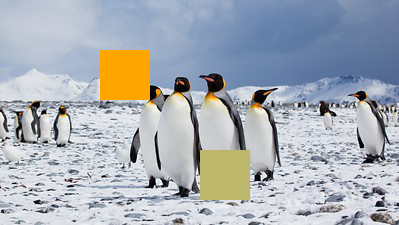

In [15]:
Image.fromarray(A)

Congratulations on making it to the end of the Python portion of Math 9!  Thank you for these last four weeks, and good luck with whatever programming material you learn next.